##**Data Loading and Initial Preprocessing**

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', error_bad_lines=False)

# Drop unnecessary columns and display first few rows
data_df = data.drop(['Age', 'Unnamed: 0', 'Clothing ID', 'Rating', 'Positive Feedback Count', 'Title', 'Unnamed: 0'], axis=1)
data_df.head()


<ipython-input-66-0d24efbd260d>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', error_bad_lines=False)


,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


##**Handling Missing Values**

In [88]:
# Summarize missing data
print("Sum of Missing Data\n")
print(data_df.isna().sum())
print("-------------------------------------------------\n")
# Drop rows with missing values in 'Class Name' and display missing data sum
data_df = data_df.dropna(subset=['Class Name', 'Review Text'])
print(data_df.isna().sum())

Sum of Missing Data

Review Text        0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
Review_length      0
Processed_Text     0
dtype: int64
-------------------------------------------------

Review Text        0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
Review_length      0
Processed_Text     0
dtype: int64


###**Convert 'Recommended IND' to categorical labels**



In [68]:
data_df['Recommended IND'] = data_df['Recommended IND'].replace({0: 'Negative', 1: 'Positive'})
data_df.head()

,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,Absolutely wonderful - silky and sexy and comf...,Positive,Initmates,Intimate,Intimates
1,Love this dress! it's sooo pretty. i happene...,Positive,General,Dresses,Dresses
2,I had such high hopes for this dress and reall...,Negative,General,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,General Petite,Bottoms,Pants
4,This shirt is very flattering to all due to th...,Positive,General,Tops,Blouses


##**Exploratory Data Analysis**

In [79]:
# Add new column for review length and display random samples
data_df['Review_length'] = data_df['Review Text'].apply(len)
data_df.sample(10)

#Exploring the Length of each Review
a = data_df['Review_length'].describe()
print ('Description\n',a)
print("-------------------------------------------------\n")
# Display longest and shortest reviews
print('Longest Review =', data_df[data_df['Review_length'] == data_df['Review_length'].max()]['Review Text'].iloc[0])
print('Shortest Review =', data_df[data_df['Review_length'] == data_df['Review_length'].min()]['Review Text'].iloc[0])

Description
 count    22628.000000
mean       308.761534
std        143.934126
min          9.000000
25%        186.000000
50%        302.000000
75%        459.000000
max        508.000000
Name: Review_length, dtype: float64
-------------------------------------------------

Longest Review = I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl
Shortest Review = Great fit


##**Text Preprocessing for Reviews**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


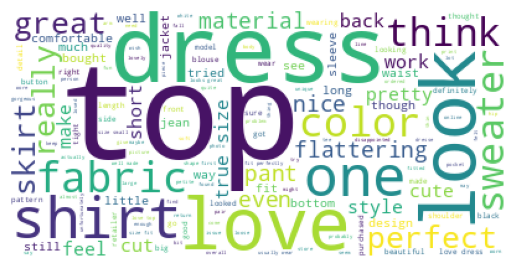

In [80]:
import nltk
import re
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to preprocess text data
def text_processing(text):
    # Remove non-alphabetic characters and stopwords
    text = re.sub('[^A-Za-z]+', ' ', str(text)).lower()
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply text processing and generate word cloud
data_df['Processed_Text'] = data_df['Review Text'].apply(text_processing)
text_for_wordcloud = ' '.join(review for review in data_df['Processed_Text'])
wordcloud = WordCloud(background_color ='white').generate(text_for_wordcloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


##**Model Building and Evaluation**

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Define Logistic Regression and Random Forest models
models = [("Logistic Regression", LogisticRegression(max_iter=100000)), ("Random Forest", RandomForestClassifier())]
X = data_df['Processed_Text']
y = data_df['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data and train models
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
for name, model in models:
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    # Print Evaluation Metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Execution time: %.2f seconds" % execution_time)
    print(f"-------------------------------------------------\n")


Model: Logistic Regression
Accuracy: 0.8798055678303137
Execution time: 2646.76 seconds
-------------------------------------------------

Model: Random Forest
Accuracy: 0.8566062748563853
Execution time: 2646.76 seconds
-------------------------------------------------



In [96]:
# Testing new text data with Logistic Regression and Random Forest models
unseen_text = ["How can the color differ so much. Sad and disappointed", "Top is lovely", "Not recommending this shirt"]
unseen_text_vec = vectorizer.transform(unseen_text)

for name, model_tts in models:
    unseen_text_pred = model_tts.predict(unseen_text_vec)
    for i, text in enumerate(unseen_text):
        print(f"Prediction: {unseen_text_pred[i]}")
    print("-------------------------------------------------\n")

Prediction: Negative
Prediction: Positive
Prediction: Positive
-------------------------------------------------

Prediction: Negative
Prediction: Positive
Prediction: Positive
-------------------------------------------------



#**Implementing LSTM Model**
####**Data Preprocessing and Tokenization**

In [100]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Define a mapping from string values to integers
mapping = {'Positive': 1, 'Negative': 0}

# Apply the mapping to the target variable
Y = data_df['Recommended IND'].apply(lambda x: mapping[x])

# Tokenize the text data without limiting the number of words
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(data_df['Processed_Text'].values)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(data_df['Processed_Text'].values)

# Calculate the length of each review
review_lengths = [len(x) for x in sequences]

# Calculate the 5th and 95th percentiles
fifth_percentile = np.percentile(review_lengths, 5)
ninety_fifth_percentile = np.percentile(review_lengths, 95)

# Filter out reviews outside the 5th to 95th percentile range
filtered_sequences = [seq for seq in sequences if len(seq) >= fifth_percentile and len(seq) <= ninety_fifth_percentile]
# Apply the mapping to convert string labels to integers during filtering
filtered_labels = [mapping[data_df['Recommended IND'].iloc[i]] for i, seq in enumerate(sequences) if len(seq) >= fifth_percentile and len(seq) <= ninety_fifth_percentile]
# Pad sequences
max_seq_length = 400
X = pad_sequences(filtered_sequences, maxlen=max_seq_length)

# Convert labels to numpy array
Y = np.array(filtered_labels)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the embedding input dimension as the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1

####**LSTM Model Building and Training**

In [101]:
import time
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

# Define the neural network architecture with the correct embedding input dimension
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 256, input_length=max_seq_length))  # Adjust the embedding layer
model_lstm.add(LSTM(256, dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Model training
start_time = time.time()
model_lstm.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64, callbacks=[early_stop, checkpoint])

# Load the best model
model_lstm.load_weights('best_model.h5')

# Test the model
Y_pred = model_lstm.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)

end_time = time.time()
execution_time = end_time - start_time  # Execution time in seconds

# Print the performance metrics
print('Accuracy:', accuracy)
print("Execution time: %.2f seconds" % execution_time)

Epoch 1/10
262/262 [==============================] - ETA: 0s - loss: 0.3223 - accuracy: 0.8659
Epoch 1: val_loss improved from inf to 0.25761, saving model to best_model.h5
262/262 [==============================] - 632s 2s/step - loss: 0.3223 - accuracy: 0.8659 - val_loss: 0.2576 - val_accuracy: 0.8871
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


262/262 [==============================] - ETA: 0s - loss: 0.2051 - accuracy: 0.9163
Epoch 2: val_loss did not improve from 0.25761
262/262 [==============================] - 624s 2s/step - loss: 0.2051 - accuracy: 0.9163 - val_loss: 0.2759 - val_accuracy: 0.8773
Epoch 3/10
262/262 [==============================] - ETA: 0s - loss: 0.1509 - accuracy: 0.9414
Epoch 3: val_loss did not improve from 0.25761
262/262 [==============================] - 624s 2s/step - loss: 0.1509 - accuracy: 0.9414 - val_loss: 0.3023 - val_accuracy: 0.8837
Epoch 4/10
262/262 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9590
Epoch 4: val_loss did not improve from 0.25761
262/262 [==============================] - 614s 2s/step - loss: 0.1096 - accuracy: 0.9590 - val_loss: 0.3289 - val_accuracy: 0.8722
Epoch 4: early stopping
131/131 [==============================] - 37s 281ms/step
Accuracy: 0.8870813397129187
Execution time: 2580.87 seconds


####**Testing Unseen Reviews with LSTM Model**

In [105]:
# Tokenize and pad unseen text
unseen_text = ["How can the color differ so much. Sad and disappointed", "Top is lovely", "Not recommending this shirt"]
unseen_text_seq = tokenizer.texts_to_sequences(unseen_text)
unseen_text_padded = pad_sequences(unseen_text_seq, maxlen=max_seq_length)

# Make predictions with LSTM model
unseen_text_pred = model_lstm.predict(unseen_text_padded)
threshold = 0.7
for i, text in enumerate(unseen_text):
    if unseen_text_pred[i] > threshold:
        print(f"New Text Prediction {i+1}: Positive")
    else:
        print(f"New Text Prediction {i+1}: Negative")


1/1 [==============================] - 0s 263ms/step
New Text Prediction 1: Negative
New Text Prediction 2: Positive
New Text Prediction 3: Negative
